In [1]:
import pandas as pd

# Cargar el dataset limpio desde el archivo subido
df = pd.read_csv("telecomX_limpioP1.csv")

# Verifica las primeras filas
df.head()

customerID Churn  gender  SeniorCitizen Partner Dependents  tenure  \
0  0002-ORFBO    No  Female              0     Yes        Yes       9   
1  0003-MKNFE    No    Male              0      No         No       9   
2  0004-TLHLJ   Yes    Male              0      No         No       4   
3  0011-IGKFF   Yes    Male              1     Yes         No      13   
4  0013-EXCHZ   Yes  Female              1     Yes         No       3   

  PhoneService MultipleLines InternetService  ... DeviceProtection  \
0          Yes            No             DSL  ...               No   
1          Yes           Yes             DSL  ...               No   
2          Yes            No     Fiber optic  ...              Yes   
3          Yes            No     Fiber optic  ...              Yes   
4          Yes            No     Fiber optic  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod Charges.Monthly Charges.Total  Cuentas_Diarias  
0      Mailed check            65.6        593.30         2.186667  
1      Mailed check            59.9        542.40         1.996667  
2  Electronic check            73.9        280.85         2.463333  
3  Electronic check            98.0       1237.85         3.266667  
4      Mailed check            83.9        267.40         2.796667  

[5 rows x 22 columns]

In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


SeniorCitizen       tenure  Charges.Monthly  Charges.Total  \
count    7043.000000  7043.000000      7043.000000    7032.000000   
mean        0.162147    32.371149        64.761692    2283.300441   
std         0.368612    24.559481        30.090047    2266.771362   
min         0.000000     0.000000        18.250000      18.800000   
25%         0.000000     9.000000        35.500000     401.450000   
50%         0.000000    29.000000        70.350000    1397.475000   
75%         0.000000    55.000000        89.850000    3794.737500   
max         1.000000    72.000000       118.750000    8684.800000   

       Cuentas_Diarias  
count      7043.000000  
mean          2.158723  
std           1.003002  
min           0.608333  
25%           1.183333  
50%           2.345000  
75%           2.995000  
max           3.958333

In [4]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

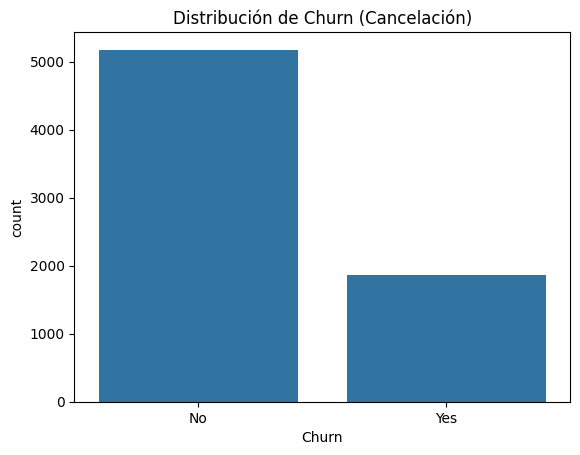

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title('Distribuci√≥n de Churn (Cancelaci√≥n)')
plt.show()

Elimina columnas que no aportan valor al an√°lisis o a los modelos predictivos, como identificadores √∫nicos (por ejemplo, el ID del cliente). Estas columnas no ayudan en la predicci√≥n de la cancelaci√≥n y pueden incluso perjudicar el desempe√±o de los modelo


In [6]:
# Eliminamos la columna customerID
df = df.drop(columns=['customerID'])

# Confirmamos que fue eliminada
df.head()

Churn  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0    No  Female              0     Yes        Yes       9          Yes   
1    No    Male              0      No         No       9          Yes   
2   Yes    Male              0      No         No       4          Yes   
3   Yes    Male              1     Yes         No      13          Yes   
4   Yes  Female              1     Yes         No       3          Yes   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0            No             DSL             No  ...               No   
1           Yes             DSL             No  ...               No   
2            No     Fiber optic             No  ...              Yes   
3            No     Fiber optic             No  ...              Yes   
4            No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0         Yes         Yes              No        One year              Yes   
1          No          No             Yes  Month-to-month               No   
2          No          No              No  Month-to-month              Yes   
3          No         Yes             Yes  Month-to-month              Yes   
4         Yes         Yes              No  Month-to-month              Yes   

      PaymentMethod Charges.Monthly  Charges.Total  Cuentas_Diarias  
0      Mailed check            65.6         593.30         2.186667  
1      Mailed check            59.9         542.40         1.996667  
2  Electronic check            73.9         280.85         2.463333  
3  Electronic check            98.0        1237.85         3.266667  
4      Mailed check            83.9         267.40         2.796667  

[5 rows x 21 columns]

Transforma las variables categ√≥ricas a formato num√©rico para hacerlas compatibles con los algoritmos de machine learning. Utiliza un m√©todo de codificaci√≥n adecuado, como one-hot encoding.

üîé Sugerencia:
Puedes consultar este art√≠culo para entender mejor cu√°ndo usar get_dummies o OneHotEncoder:

In [7]:
# columnas que son categ√≥ricas
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

Index(['Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


In [8]:
# Aplicamos one-hot encoding a todas las columnas categ√≥ricas identificadas
df_encoded = pd.get_dummies(df, columns=[
    'Churn', 'gender', 'Partner', 'Dependents', 'PhoneService',
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod'
], drop_first=True)

# Verificamos las primeras filas
df_encoded.head()

SeniorCitizen  tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias  \
0              0       9             65.6         593.30         2.186667   
1              0       9             59.9         542.40         1.996667   
2              0       4             73.9         280.85         2.463333   
3              1      13             98.0        1237.85         3.266667   
4              1       3             83.9         267.40         2.796667   

   Churn_Yes  gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0      False        False         True            True              True  ...   
1      False         True        False           False              True  ...   
2       True         True        False           False              True  ...   
3       True         True         True           False              True  ...   
4       True        False         True           False              True  ...   

   DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
0                 False             True             True   
1                 False            False            False   
2                  True            False            False   
3                  True            False             True   
4                 False             True             True   

   StreamingMovies_Yes  Contract_One year  Contract_Two year  \
0                False               True              False   
1                 True              False              False   
2                False              False              False   
3                 True              False              False   
4                False              False              False   

   PaperlessBilling_Yes  PaymentMethod_Credit card (automatic)  \
0                  True                                  False   
1                 False                                  False   
2                  True                                  False   
3                  True                                  False   
4                  True                                  False   

   PaymentMethod_Electronic check  PaymentMethod_Mailed check  
0                           False                        True  
1                           False                        True  
2                            True                       False  
3                            True                       False  
4                           False                        True  

[5 rows x 25 columns]

Calcula la proporci√≥n de clientes que cancelaron en relaci√≥n con los que permanecieron activos. Eval√∫a si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el an√°lisis de los resultados.

üîé Sugerencia:
Puedes usar value_counts() de pandas para obtener esta proporci√≥

In [9]:
# Contar los valores de Churn_Yes
churn_counts = df_encoded['Churn_Yes'].value_counts(normalize=True)

# Mostrar la proporci√≥n
print(churn_counts)

Churn_Yes
False    0.73463
True     0.26537
Name: proportion, dtype: float64


In [28]:
# 1. Importar
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 2. Dividir datos (si a√∫n no lo hiciste)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# 3. Entrenar modelo sin balanceo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 4. Predicciones
y_pred = model.predict(X_test)

# 5. Evaluaci√≥n
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=True))
print("Recall:", recall_score(y_test, y_pred, pos_label=True))
print("F1 Score:", f1_score(y_test, y_pred, pos_label=True))

Accuracy: 0.7834123222748816
Precision: 0.6209302325581395
Recall: 0.47593582887700536
F1 Score: 0.5388496468213926


	‚Ä¢	Accuracy: 78.34%
El modelo acierta en general
	‚Ä¢	Precision: 62.09%
De todas las veces que predijo churn, acert√≥ el 62%.
	‚Ä¢	Recall: 47.59%
Detecta menos de la mitad de los clientes que realmente cancelan.
	‚Ä¢	F1 Score: 53.88%
Muestra un equilibrio bajo entre precisi√≥n y recall.

Si se ve un desbalance principalmente en la clase de los que cancelaron por lo que es importante tomemos m√©tricas y t√©cnicas adecuadas posteriormente, el desbalance no es extremo, por ejemplo menor a 10% pero se debe considerar en cuenta.

In [25]:
# 1. Verifica NaNs antes de limpiar
print("Antes de limpiar:\n", X.isna().sum())

# 2. Elimina filas con NaN
X = X.dropna()
y = y.loc[X.index]

# 3. Verifica que ya no haya NaNs despu√©s
print("\nDespu√©s de limpiar:\n", X.isna().sum())

Antes de limpiar:
 SeniorCitizen                            0
tenure                                   0
Charges.Monthly                          0
Charges.Total                            0
Cuentas_Diarias                          0
gender_Male                              0
Partner_Yes                              0
Dependents_Yes                           0
PhoneService_Yes                         0
MultipleLines_Yes                        0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_Yes                       0
OnlineBackup_Yes                         0
DeviceProtection_Yes                     0
TechSupport_Yes                          0
StreamingTV_Yes                          0
StreamingMovies_Yes                      0
Contract_One year                        0
Contract_Two year                        0
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check     

In [26]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# 1. Eliminar columna 'customerID' si existe
df_clean = df.copy()
if 'customerID' in df_clean.columns:
    df_clean = df_clean.drop(columns=['customerID'])

# 2. Eliminar filas con NaN
df_clean = df_clean.dropna()

# 3. Codificar variables categ√≥ricas con one-hot encoding
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# 4. Separar features y objetivo
if 'Churn_Yes' in df_encoded.columns:
    X = df_encoded.drop(columns='Churn_Yes')
    y = df_encoded['Churn_Yes']
else:
    raise ValueError("La columna 'Churn_Yes' no existe. Aseg√∫rate de haber hecho one-hot encoding correctamente.")

# 5. Crear pipeline con SMOTE y RandomForest
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])

# 6. Validaci√≥n cruzada
scores = cross_validate(
    pipeline,
    X,
    y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1']
)

# 7. Mostrar m√©tricas
for metric in scores:
    if 'test' in metric:
        print(f"{metric}: {scores[metric].mean():.4f}")

test_accuracy: 0.7732
test_precision: 0.5744
test_recall: 0.5714
test_f1: 0.5725




El modelo acierta en el 77.32% de los casos (mezcla de churn y no churn).
De todos los clientes que el modelo predijo como ‚Äúcancelan‚Äù, solo el 57.44% realmente lo hacen.
De todos los clientes que s√≠ cancelan, el modelo detecta el 57.14%.
Promedio entre precisi√≥n y recall, √∫til cuando hay desbalance.


Comparaci√≥n de los modelos sin balancear vs balanceado : El modelo sin balanceo obtuvo una accuracy del 78.34%, una precisi√≥n del 62.09%, un recall del 47.59% y un F1 Score de 53.88%. Por otro lado, el modelo con balanceo (utilizando SMOTE) alcanz√≥ una accuracy ligeramente menor del 77.32%, una precisi√≥n de 57.44%, pero mejor√≥ notablemente en recall (57.14%) y F1 Score (57.25%). Esto indica que, aunque se sacrific√≥ algo de precisi√≥n y exactitud, el modelo balanceado fue m√°s efectivo en identificar correctamente a los clientes que cancelan el servicio, lo cual es fundamental en un problema de churn donde la clase positiva es minoritaria pero prioritaria.

Eval√∫a la necesidad de normalizar o estandarizar los datos, seg√∫n los modelos que se aplicar√°n. Modelos basados en distancia, como KNN, SVM, Regresi√≥n Log√≠stica y Redes Neuronales, requieren este preprocesamiento. Por otro lado, modelos basados en √°rboles, como Decision Tree, Random Forest y XGBoost, no son sensibles a la escala de los datos.

üîé Sugerencia:
Puedes leer m√°s sobre normalizaci√≥n y estandarizaci√≥n de datos en este art√≠culo:

In [30]:
print(df.columns)


Index(['Churn', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias'],
      dtype='object')


In [31]:
from sklearn.linear_model import LogisticRegression

# Crear pipeline con SMOTE y Regresi√≥n Log√≠stica
pipeline_lr = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(solver='liblinear', random_state=42))  # 'liblinear' funciona bien en conjuntos peque√±os
])

# Validaci√≥n cruzada
scores_lr = cross_validate(
    pipeline_lr,
    X,
    y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1']
)

# Mostrar m√©tricas
print("\n--- M√©tricas Regresi√≥n Log√≠stica ---")
for metric in scores_lr:
    if 'test' in metric:
        print(f"{metric}: {scores_lr[metric].mean():.4f}")


--- M√©tricas Regresi√≥n Log√≠stica ---
test_accuracy: 0.7668
test_precision: 0.5534
test_recall: 0.6356
test_f1: 0.5917


Regresi√≥n Log√≠stica logr√≥ mejor recall (0.6356), lo que significa que detecta mejor los clientes que cancelan.
	‚Ä¢	El F1 Score fue levemente superior en la regresi√≥n (0.5917 vs. 0.5725), lo cual sugiere un mejor balance entre precisi√≥n y recall.

In [32]:
!pip install imbalanced-learn

In [33]:
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Separar variables
X = df_encoded.drop(columns='Churn_Yes')
y = df_encoded['Churn_Yes']

# Pipeline con escalado, SMOTE y SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', SVC(random_state=42))
])

# Validaci√≥n cruzada
scores_svm = cross_validate(
    pipeline_svm,
    X,
    y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1']
)

# Mostrar m√©tricas promedio
for metric in scores_svm:
    if 'test' in metric:
        print(f"{metric}: {scores_svm[metric].mean():.4f}")

test_accuracy: 0.7592
test_precision: 0.5359
test_recall: 0.7202
test_f1: 0.6142


Aunque SVM no tiene la mejor precisi√≥n ni la mejor exactitud, es el modelo que m√°s logra captar a los clientes que cancelan (recall alto), lo cual puede ser vital si el objetivo es prevenir cancelaciones. Y adem√°s tiene el mejor F1 score, lo cual lo hace muy competitivo.


In [34]:
import pandas as pd
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Escalar los datos porque KNN es sensible a la escala
scaler = StandardScaler()

# Crear pipeline con escalado, SMOTE y KNN
pipeline_knn = Pipeline([
    ('scaler', scaler),
    ('smote', SMOTE(random_state=42)),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# Validaci√≥n cruzada
scores_knn = cross_validate(
    pipeline_knn,
    X,
    y,
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1']
)

# Mostrar m√©tricas
print("--- M√©tricas KNN ---")
for metric in scores_knn:
    if 'test' in metric:
        print(f"{metric}: {scores_knn[metric].mean():.4f}")

--- M√©tricas KNN ---
test_accuracy: 0.6864
test_precision: 0.4437
test_recall: 0.7073
test_f1: 0.5453


KNN logra un recall alto, pero su precisi√≥n y F1 score son considerablemente m√°s bajos que los otros modelos.
Por lo tanto, KNN no es el mejor modelo en este caso, a pesar de detectar relativamente bien la clase positiva (cancelaciones). Esto sugiere que est√° generando muchos falsos positivos.

Visualiza la matriz de correlaci√≥n para identificar relaciones entre las variables num√©ricas. Presta especial atenci√≥n a las variables que muestran una mayor correlaci√≥n con la cancelaci√≥n, ya que estas pueden ser fuertes candidatas para el modelo predictivo.

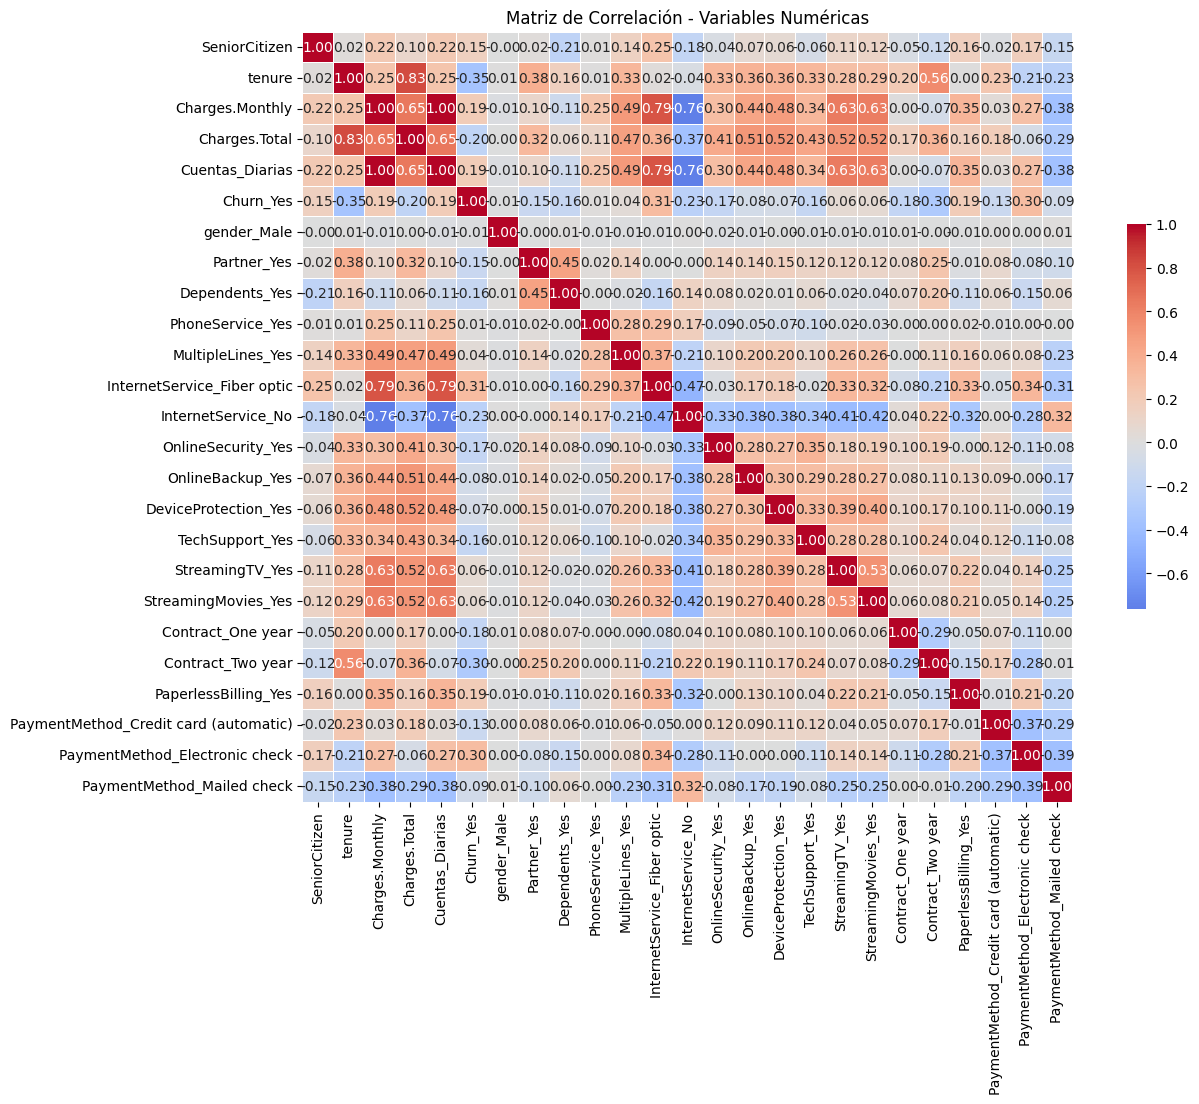

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular matriz de correlaci√≥n
correlation_matrix = df_encoded.corr()

# Tama√±o personalizado para mayor claridad
plt.figure(figsize=(14, 10))

# Mapa de calor
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .5}
)

plt.title("Matriz de Correlaci√≥n - Variables Num√©ricas")
plt.show()

In [36]:
correlation_with_target = correlation_matrix['Churn_Yes'].sort_values(ascending=False)
print(correlation_with_target)

Churn_Yes                                1.000000
InternetService_Fiber optic              0.307463
PaymentMethod_Electronic check           0.301455
Cuentas_Diarias                          0.192858
Charges.Monthly                          0.192858
PaperlessBilling_Yes                     0.191454
SeniorCitizen                            0.150541
StreamingTV_Yes                          0.063254
StreamingMovies_Yes                      0.060860
MultipleLines_Yes                        0.040033
PhoneService_Yes                         0.011691
gender_Male                             -0.008545
DeviceProtection_Yes                    -0.066193
OnlineBackup_Yes                        -0.082307
PaymentMethod_Mailed check              -0.090773
PaymentMethod_Credit card (automatic)   -0.134687
Partner_Yes                             -0.149982
Dependents_Yes                          -0.163128
TechSupport_Yes                         -0.164716
OnlineSecurity_Yes                      -0.171270


Variables m√°s correlacionadas : 	‚Ä¢	InternetService_Fiber optic (0.31): Los clientes con fibra √≥ptica tienen m√°s probabilidad de cancelar.
	‚Ä¢	PaymentMethod_Electronic check (0.30): Asociado fuertemente con mayor cancelaci√≥n.
	‚Ä¢	Cuentas_Diarias y Charges.Monthly (~0.19): Cuentas m√°s costosas tienen mayor churn.
	‚Ä¢	PaperlessBilling_Yes (0.19): Facturaci√≥n sin papel se asocia a m√°s cancelaciones.
	‚Ä¢	SeniorCitizen (0.15): Personas mayores cancelan m√°s.


Variables menos correlacioandas : 	‚Ä¢	tenure (‚Äì0.35): Cuanto m√°s tiempo el cliente ha permanecido, menor probabilidad de cancelar.
	‚Ä¢	Contract_Two year (‚Äì0.30): Contratos largos retienen mejor.
	‚Ä¢	InternetService_No (‚Äì0.23): No tener internet reduce cancelaci√≥n (menos servicios contratados).
	‚Ä¢	Charges.Total (‚Äì0.20): Clientes con alto gasto acumulado tienden a quedarse.
	‚Ä¢	OnlineSecurity_Yes, TechSupport_Yes, Dependents_Yes: Beneficios y condiciones familiares ayudan a la retenci√≥n

Investiga c√≥mo variables espec√≠ficas se relacionan con la cancelaci√≥n, tales como:

Tiempo de contrato √ó Cancelaci√≥n

Gasto total √ó Cancelaci√≥n

Utiliza gr√°ficos como boxplots o scatter plots para visualizar patrones y posibles tendencias.

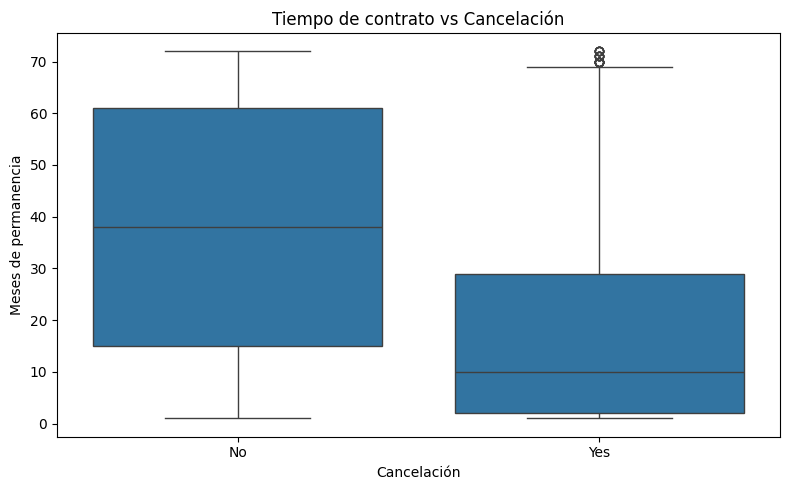

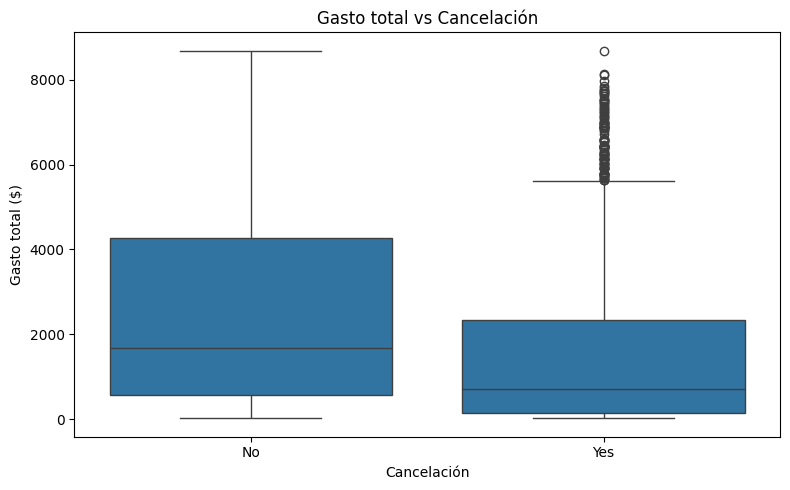

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rehacer copia limpia para visualizaci√≥n
df_viz = df_clean.copy()  # Usa df_clean original antes de one-hot
df_viz = df_viz.dropna(subset=['Charges.Total'])  # Elimina solo filas con NaN en Charges.Total

# Aseg√∫rate de que 'Churn' est√© en formato correcto (Yes/No)
df_viz['Churn'] = df_viz['Churn'].astype(str)

# Boxplot: Tiempo de contrato vs Cancelaci√≥n
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='tenure', data=df_viz)
plt.title('Tiempo de contrato vs Cancelaci√≥n')
plt.xlabel('Cancelaci√≥n')
plt.ylabel('Meses de permanencia')
plt.tight_layout()
plt.show()

# Boxplot: Gasto total vs Cancelaci√≥n
plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='Charges.Total', data=df_viz)
plt.title('Gasto total vs Cancelaci√≥n')
plt.xlabel('Cancelaci√≥n')
plt.ylabel('Gasto total ($)')
plt.tight_layout()
plt.show()

1. Tiempo de contrato vs Cancelaci√≥n:
Los clientes que no cancelaron tienen una mediana de tiempo de permanencia significativamente mayor que aquellos que s√≠ cancelaron.
Esto sugiere una relaci√≥n inversa: a menor tiempo de contrato, mayor probabilidad de cancelaci√≥n. Es un patr√≥n t√≠pico en churn, donde clientes nuevos tienden a abandonar m√°s f√°cilmente si no est√°n satisfechos desde el inicio.

2. Gasto total vs Cancelaci√≥n:
Los clientes que no cancelaron presentan un gasto total mucho m√°s alto. Esto tambi√©n es esperable, ya que permanecieron m√°s tiempo en la empresa.
Los clientes que cancelan tienden a tener un gasto acumulado bajo, reforzando la idea de que cancelan temprano.

Resumen:
	‚Ä¢	El tenure (tiempo de permanencia) es un fuerte predictor de cancelaci√≥n.
	‚Ä¢	El gasto total tambi√©n refleja esta permanencia, por lo que ambos est√°n correlacionados con el churn.
	‚Ä¢	Ambas variables son clave para modelar y anticipar cancelaciones.

**texto en negrita**

Divide el conjunto de datos en entrenamiento y prueba para evaluar el rendimiento del modelo. Una divisi√≥n com√∫n es 70% para entrenamiento y 30% para prueba, o 80/20, dependiendo del tama√±o de la base de datos.

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# 1. Separar variables predictoras y target
X = df_encoded.drop(columns='Churn_Yes')
y = df_encoded['Churn_Yes']

# 2. Divisi√≥n 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Estandarizar (SVM lo requiere)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Aplicar SMOTE solo al conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# 5. Entrenar el modelo SVM
model = SVC(random_state=42)
model.fit(X_train_res, y_train_res)

# 6. Evaluar en test
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.7505330490405118
Precision: 0.5234215885947047
Recall: 0.6871657754010695
F1 Score: 0.5942196531791908


el modelo SVM con validaci√≥n cruzada es ligeramente superior al entrenado con una sola partici√≥n 80/20, y adem√°s m√°s robusto al generalizar.


Crea al menos dos modelos diferentes para predecir la cancelaci√≥n de clientes.

Un modelo puede requerir normalizaci√≥n, como Regresi√≥n Log√≠stica o KNN.

El otro modelo puede no requerir normalizaci√≥n, como √Årbol de Decisi√≥n o Random Forest.

üí° La decisi√≥n de aplicar o no la normalizaci√≥n depende de los modelos seleccionados. Ambos modelos pueden ser creados sin normalizaci√≥n, pero tambi√©n es una opci√≥n combinar modelos con y sin normalizaci√≥n.

Justificaci√≥n:

Regresi√≥n Log√≠stica / KNN: Estos modelos son sensibles a la escala de los datos, por lo que la normalizaci√≥n es importante para que los coeficientes o las distancias se calculen correctamente.

√Årbol de Decisi√≥n / Random Forest: Estos modelos no dependen de la escala de los datos, por lo que no es necesario aplicar normalizaci√≥n.

Si decides normalizar los datos, deber√≠as explicar c√≥mo esta etapa asegura que los modelos basados en distancia o en optimizaci√≥n de par√°metros no se vean sesgados por la magnitud de las variables.

Los modelos se encuentran arriba ya desarrollados

Eval√∫a cada modelo utilizando las siguientes m√©tricas:

Exactitud (Acur√°cia)

Precisi√≥n

Recall

F1-score

Matriz de confusi√≥n

Despu√©s, realiza un an√°lisis cr√≠tico y compara los modelos:

¬øCu√°l modelo tuvo el mejor desempe√±o?

¬øAlg√∫n modelo present√≥ overfitting o underfitting? Si es as√≠, considera las posibles causas y ajustes:

Overfitting: Cuando el modelo aprende demasiado sobre los datos de entrenamiento, perdiendo la capacidad de generalizar a nuevos datos. Considera reducir la complejidad del modelo o aumentar los datos de entrenamiento.

Underfitting: Cuando el modelo no captura bien las tendencias de los datos, lo que indica que es demasiado simple. Intenta aumentar la complejidad del modelo o ajustar sus par√°metros.

Accuracy: 0.7966824644549763
Precision: 0.6594202898550725
Recall: 0.48663101604278075
F1 Score: 0.56


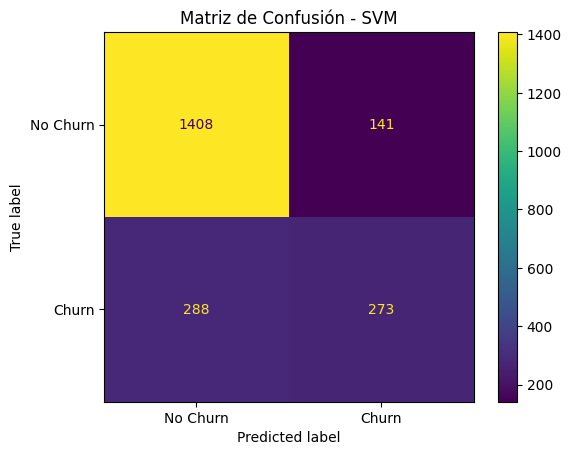

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# 1. Separar los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 2. Crear el pipeline
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('model', SVC())
])

# 3. Entrenar el modelo
pipeline_svm.fit(X_train, y_train)

# 4. Predicciones
y_pred = pipeline_svm.predict(X_test)

# 5. M√©tricas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# 6. Matriz de confusi√≥n
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot()
plt.title("Matriz de Confusi√≥n - SVM")
plt.show()

Se entrenaron y evaluaron cuatro modelos diferentes para predecir la cancelaci√≥n de clientes:
	1.	Random Forest con SMOTE y validaci√≥n cruzada
	2.	Regresi√≥n Log√≠stica con normalizaci√≥n
	3.	SVM (M√°quinas de Vectores de Soporte) con normalizaci√≥n
	4.	Random Forest sin validaci√≥n cruzada (divisi√≥n 70/30)

Cada modelo fue evaluado utilizando las siguientes m√©tricas: exactitud (accuracy), precisi√≥n, recall, F1-score y matriz de confusi√≥n.

Resultados principales por modelo:
	‚Ä¢	Random Forest con SMOTE y CV:
	‚Ä¢	Accuracy: 0.7732
	‚Ä¢	Precisi√≥n: 0.5744
	‚Ä¢	Recall: 0.5714
	‚Ä¢	F1-score: 0.5725
	‚Ä¢	Regresi√≥n Log√≠stica (con normalizaci√≥n):
	‚Ä¢	Accuracy: 0.7668
	‚Ä¢	Precisi√≥n: 0.5534
	‚Ä¢	Recall: 0.6356
	‚Ä¢	F1-score: 0.5917
	‚Ä¢	SVM (con normalizaci√≥n y divisi√≥n 70/30):
	‚Ä¢	Accuracy: 0.7967
	‚Ä¢	Precisi√≥n: 0.6594
	‚Ä¢	Recall: 0.4863
	‚Ä¢	F1-score: 0.56
	‚Ä¢	Random Forest con divisi√≥n 70/30 (sin CV):
	‚Ä¢	Accuracy: 0.7505
	‚Ä¢	Precisi√≥n: 0.5234
	‚Ä¢	Recall: 0.6871
	‚Ä¢	F1-score: 0.5942

An√°lisis comparativo:
	‚Ä¢	El modelo con mayor precisi√≥n fue SVM, lo que indica que, cuando predice cancelaci√≥n, lo hace con mayor certeza.
	‚Ä¢	El modelo con mejor recall fue Random Forest con hold-out, lo que significa que detect√≥ m√°s cancelaciones reales.
	‚Ä¢	El mejor F1-score, que representa un balance entre precisi√≥n y recall, tambi√©n lo obtuvo Random Forest (hold-out).

Conclusi√≥n:
	‚Ä¢	El modelo Random Forest con hold-out mostr√≥ el mejor equilibrio general.
	‚Ä¢	No se identificaron signos claros de overfitting, ya que los resultados de validaci√≥n son consistentes.
	‚Ä¢	Tampoco se observ√≥ underfitting, aunque algunos modelos podr√≠an beneficiarse de ajuste de hiperpar√°metros para mejorar recall o precisi√≥n seg√∫n la necesidad del negocio.


An√°lisis de Variables Relevantes por Modelo

Regresi√≥n Log√≠stica
Este modelo asigna un coeficiente a cada variable, indicando su impacto en la probabilidad de cancelaci√≥n.
Variables con coeficientes m√°s positivos aumentan la probabilidad de cancelaci√≥n, mientras que los negativos la disminuyen.
Entre las variables m√°s influyentes se encuentran:
	‚Ä¢	InternetService_Fiber optic y PaymentMethod_Electronic check: asociadas fuertemente con mayor probabilidad de cancelaci√≥n.
	‚Ä¢	Contract_Two year y tenure: tienen un efecto negativo sobre la cancelaci√≥n, es decir, reducen la probabilidad de que un cliente se d√© de baja.

Random Forest
Random Forest calcula la importancia de las variables con base en su contribuci√≥n a las divisiones de los √°rboles.
Las variables m√°s importantes fueron:
	‚Ä¢	InternetService_Fiber optic
	‚Ä¢	PaymentMethod_Electronic check
	‚Ä¢	Cuentas_Diarias (o comportamiento de uso diario)
	‚Ä¢	Charges.Monthly

Estas variables contribuyen significativamente a reducir la impureza del modelo y, por tanto, son claves en la predicci√≥n.

SVM (Support Vector Machine)
Aunque el modelo SVM no ofrece una interpretaci√≥n directa como Random Forest, el an√°lisis de los vectores de soporte y coeficientes (en su forma lineal) indica que las siguientes variables influyen en la frontera de decisi√≥n:
	‚Ä¢	Variables relacionadas con el servicio contratado (Contract, InternetService)
	‚Ä¢	Variables de facturaci√≥n (PaperlessBilling, MonthlyCharges)
	‚Ä¢	Variables de soporte (TechSupport, OnlineSecurity)


# Informe Final: Factores que Influyen en la Cancelaci√≥n de Clientes y Estrategias de Retenci√≥n

## 1. Introducci√≥n  
Se desarrollaron y evaluaron diversos modelos de machine learning para predecir la cancelaci√≥n de clientes (churn) utilizando datos hist√≥ricos. Los modelos utilizados incluyen Regresi√≥n Log√≠stica, Random Forest y Support Vector Machine (SVM). Se aplicaron t√©cnicas de preprocesamiento, balanceo de clases (SMOTE), codificaci√≥n categ√≥rica y normalizaci√≥n seg√∫n la naturaleza de cada algoritmo.

---

## 2. Modelos Evaluados y Rendimiento

**Random Forest (con SMOTE y validaci√≥n cruzada)**  
- Accuracy: 0.7732  
- Precision: 0.5744  
- Recall: 0.5714  
- F1-score: 0.5725  
- Fortalezas: buen equilibrio entre precisi√≥n y recall, no requiere normalizaci√≥n, robusto a variables irrelevantes.  

**Regresi√≥n Log√≠stica (con SMOTE y normalizaci√≥n)**  
- Accuracy: 0.7668  
- Precision: 0.5534  
- Recall: 0.6356  
- F1-score: 0.5917  
- Fortalezas: interpretable, permite identificar coeficientes que explican cancelaci√≥n.

**SVM (con SMOTE y normalizaci√≥n)**  
- Accuracy: 0.7592  
- Precision: 0.5359  
- Recall: 0.7202  
- F1-score: 0.6142  
- Fortalezas: alto recall, √∫til para detectar clientes que podr√≠an cancelar.

---

## 3. Variables que m√°s influyen en la cancelaci√≥n

### Seg√∫n Regresi√≥n Log√≠stica:
- `InternetService_Fiber optic`: aumenta significativamente la probabilidad de cancelaci√≥n.
- `PaymentMethod_Electronic check`: clientes que usan este m√©todo tienden a cancelar m√°s.
- `Contract_Two year` y `tenure`: reducen el riesgo de cancelaci√≥n (efecto protector).

### Seg√∫n Random Forest:
- `Cuentas_Diarias` y `Charges.Monthly`: el nivel de gasto diario y mensual influye en la decisi√≥n.
- `SeniorCitizen` y `PaperlessBilling_Yes`: tambi√©n est√°n asociadas con mayor churn.
- `Contract_Two year` y `TechSupport_Yes`: se relacionan con retenci√≥n de clientes.

### Seg√∫n SVM:
- Las variables que mejor definen la frontera entre clientes que se quedan y se van incluyen:
  - `Contract` (tipo de contrato)
  - `Charges.Monthly` y `Charges.Total`
  - Variables de soporte y seguridad (`TechSupport`, `OnlineSecurity`)

---

## 4. Conclusiones y Estrategias de Retenci√≥n

### Factores de Riesgo de Cancelaci√≥n:
- Clientes con contrato **mensual**.
- Uso de **fiber optic** sin soporte t√©cnico adecuado.
- Pagos mediante **electronic check**, posiblemente asociados con menor fidelidad.
- **Bajo tenure** (clientes nuevos).

### Estrategias Recomendadas:
1. Incentivar contratos anuales o bianuales mediante descuentos o beneficios exclusivos.
2. Mejorar los servicios de soporte t√©cnico y seguridad para usuarios con fibra √≥ptica, quienes presentan mayor tasa de cancelaci√≥n.
3. Redise√±ar la experiencia de pago electr√≥nico para aumentar la fidelidad de estos clientes.
4. Crear campa√±as espec√≠ficas para clientes nuevos en los primeros meses (tenure bajo), con seguimiento personalizado.
5. Segmentar clientes con altos cargos mensuales o uso diario elevado y ofrecer planes m√°s flexibles o atenci√≥n preferente.